### Notebook to download and preprocess data

#### 1. Download data

In [3]:
import sys
import importlib

# Ensure the data module path is in sys.path
data_module_path = "../src"
if data_module_path not in sys.path:
	sys.path.append(data_module_path)

# Import and reload the download_data module
download_data = importlib.import_module("download_data")
importlib.reload(download_data)

# Optionally, list available functions for inspection
print([attr for attr in dir(download_data) if not attr.startswith("_")])

# Call the function to download the Kaggle dataset
if hasattr(download_data, "download_kaggle_dataset"):
	download_data.download_kaggle_dataset()
else:
	raise AttributeError("download_kaggle_dataset function not found in download_data module.")

['download_kaggle_dataset', 'kagglehub', 'os', 'shutil']
Path to dataset files: ../data/external


#### 2. Prepare data and save for model development

In [ ]:
from preprocess import preprocessing
import os

# Load and preprocess data
data_dir = "../data/external/data/Original_Dataset"
dataloader, classes, class_to_idx = preprocessing.get_image_dataloader(data_dir, batch_size=32)

# Save preprocessed data 
save_path = "../data/processed/dataset.pt"
if not os.path.exists(save_path):
	preprocessing.save_entire_dataset(dataloader, save_path)
else:
	print(f"File already exists at {save_path}. Skipping save.")

File already exists at ../data/processed/dataset.pt. Skipping save.


In [8]:
# Check how many classes we have
classes

['Central Serous Chorioretinopathy',
 'Diabetic Retinopathy',
 'Disc Edema',
 'Glaucoma',
 'Healthy',
 'Macular Scar',
 'Myopia',
 'Pterygium',
 'Retinal Detachment',
 'Retinitis Pigmentosa']

In [9]:
# Check classes and assigned index
class_to_idx

{'Central Serous Chorioretinopathy': 0,
 'Diabetic Retinopathy': 1,
 'Disc Edema': 2,
 'Glaucoma': 3,
 'Healthy': 4,
 'Macular Scar': 5,
 'Myopia': 6,
 'Pterygium': 7,
 'Retinal Detachment': 8,
 'Retinitis Pigmentosa': 9}

#### 3. Display a few images

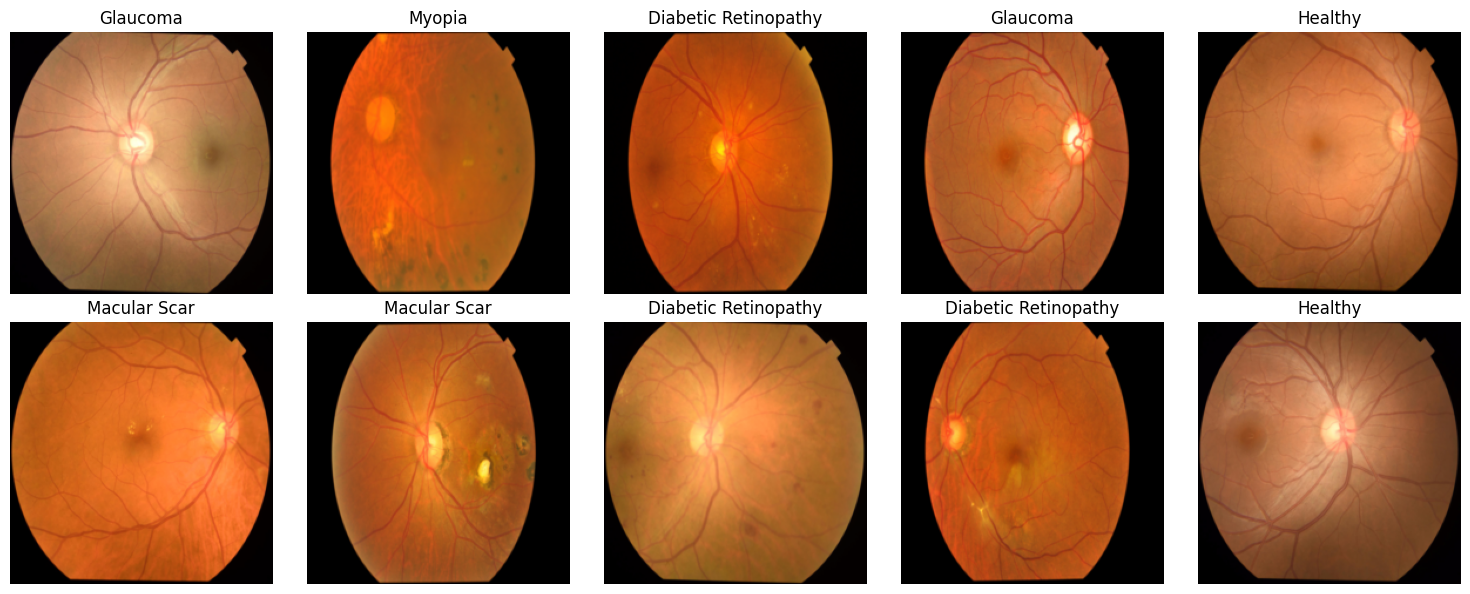

In [12]:
from visualization import visualize_images

# Example usage in notebook:
images, targets = next(iter(dataloader))
show_image_batch(images, targets, classes, num_images=10, rows=2, cols=5)